 # Projet numérique : équations de LOKTA-VOLTERRA

## Importations et configuration générale

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
#plt.ioff() 


## Question 1

### Signification des termes

- $t$ est le temps
- $x_1(t)$ : le nombre positif de proies en vie à l'instant $t$
- $x_2(t)$ : le nombre positif de prédateurs en vie à l'instant $t$
- $\dot{x_1}(t)$ : la variation de la population de proies à l'instant $t$
- $\dot{x_2}(t)$ : la viration de la population de prédateurs à l'instant $t$
- $\alpha$ : le taux de reproduction intrinsèque des proies
- $\beta$ : le taux de prédation, c'est-à-dire le taux de mortalité des proies à cause des prédateurs
- $\gamma$ : le taux de reproduction des prédateurs liés à la présence des proies
- $\delta$ : le taux de mortalité intrinsèque des prédateurs

###  Points d'équilibre

On définit :

$\begin{array}{ccccc}
f & : & \mathbb{R}^2 & \to & \mathbb{R}^2 \\
 & & (x_1, x_2) & \mapsto &  
 \begin{pmatrix}
  x_1(\alpha-\beta x_2) \\
  -x_2(\gamma - \delta x_1) \\
\end{pmatrix}
\\
\end{array}$

En revenant à la définition, on résout $f(x)=\begin{pmatrix}
  0 \\
  0 \\
\end{pmatrix}$ d'inconnue $x \in \mathbb{R}^2$.

Par disjonction de cas (si $x_1$ est nul ou non), on obtient $\begin{pmatrix}
  0 \\
  0 \\
\end{pmatrix}$
et
$\bar{x}=\begin{pmatrix}
  \frac{\alpha}{\beta} \\
  \frac{\gamma}{\delta} \\
\end{pmatrix}$ qui sont deux solutions distinctes.

### Stabilité

On calcule la matrice jacobienne de $f$, que l'on évalue ensuite en $0$ et en $\overline{x}$ :

$$
J_f(x) =
  \begin{bmatrix}
    \alpha - \beta x_2 & -\beta x_1 \\
    \delta x_2 & -(\gamma-\delta x_1)
  \end{bmatrix}
$$

D'où

$$
J_f(0) = 
\begin{bmatrix}
    \alpha & 0 \\
    0 & -\gamma
  \end{bmatrix}
\textrm{ et }
J_f(\overline{x}) = 
\begin{bmatrix}
    0 & -\beta \frac{\gamma}{\delta} \\
    \delta \frac{\alpha}{\beta} & 0
  \end{bmatrix}
$$

$\alpha > 0$ est valeur propre de $J_f(0)$ donc, par théorème, $0$ est un point d'équilibre instable. Les valeurs propres de $J_f(\overline{x})$ sont $\pm i \sqrt{\alpha\gamma}$, de parties réelles nulles. On ne peut donc rien conclure a priori.


## Question 2

In [3]:
# Choix des paramètres

# (cohérents avec leur signification ?)
#alpha = 1.5
#beta = 0.3
#gamma = 0.1
#delta = 1.2

alpha = 2/3
beta = 4/3
gamma = 1
delta = 1

nb_max = 3 # bonne échelle, cf wikipedia, en milliers
nb_tot = 20

def lk(x1, x2):
    return np.array([x1*(alpha-beta*x2),-x2*(gamma-delta*x1)])

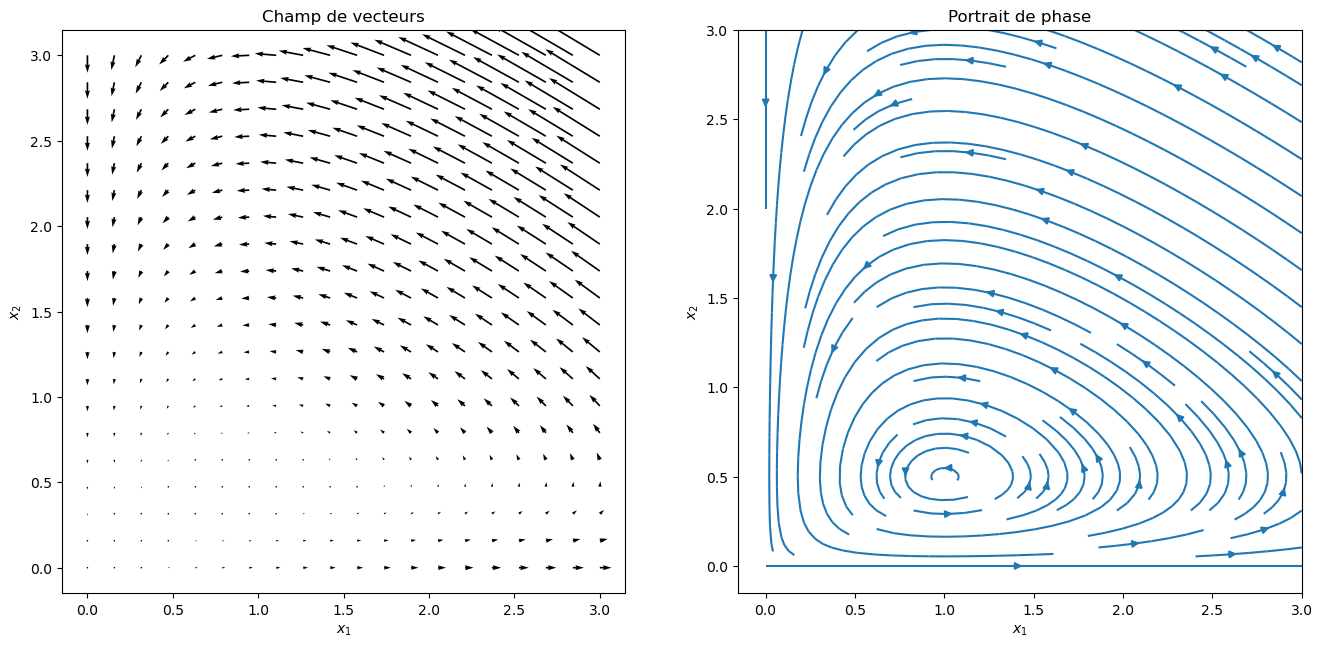

In [9]:
x = np.linspace(0, nb_max, nb_tot)
y = np.linspace(0, nb_max, nb_tot)
X,Y = np.meshgrid(x,y)
fX,fY = lk(X,Y)
ax1 = plt.subplot(1,2,1)
ax1.set_aspect('equal')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('Champ de vecteurs')
q = ax1.quiver(X, Y, fX, fY)
ax2 = plt.subplot(1,2,2)
ax2.set_aspect('equal')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Portrait de phase')
q2 = ax2.streamplot(X, Y, fX, fY);

Le champ de vecteurs met en évidence le comportement général des solutions du système d'équations différentielles, ainsi que certains points d'équilibre. Le portrait de phase permet de réaliser que les solutions sont périodiques

## Question 5

In [5]:
def h(x1,x2):
    return delta*x1-gamma*np.log(x1)+beta*x2-alpha*np.log(x2)

In [6]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

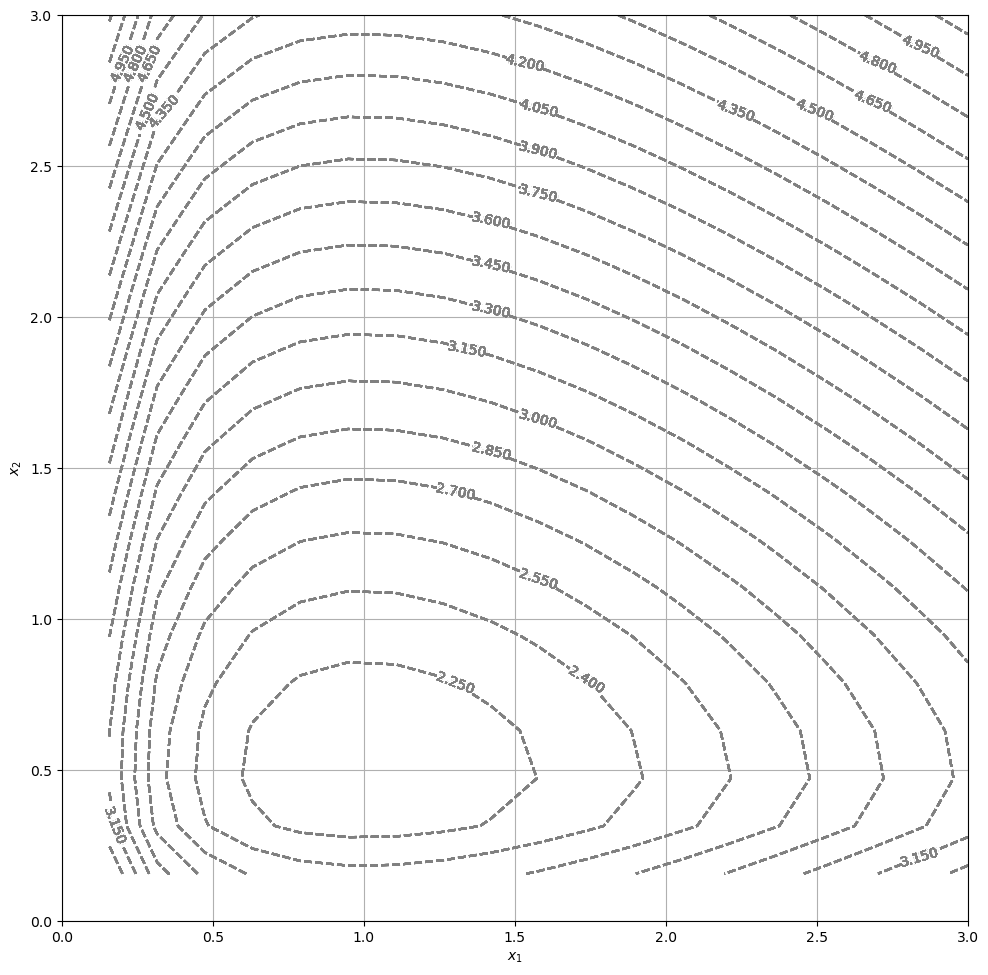

In [7]:
display_contour(h, X, Y, 30);

## Question 6

In [8]:
def solve_euler_explicit(f, x0, dt, t0, tf): # si pas multiple, s'arrête avant tf ? temps final exclut ?? pour l'instant oui
    t = [t0+n*dt for n in np.arange(0,(tf-t0)//dt+1)]
    x = [x0]
    for tps in t[:-1]:
        x.append(x[-1] + dt*f(tps, x[-1]))
    return t, x

1.0
1
148.4131591025766
149.3805636844768


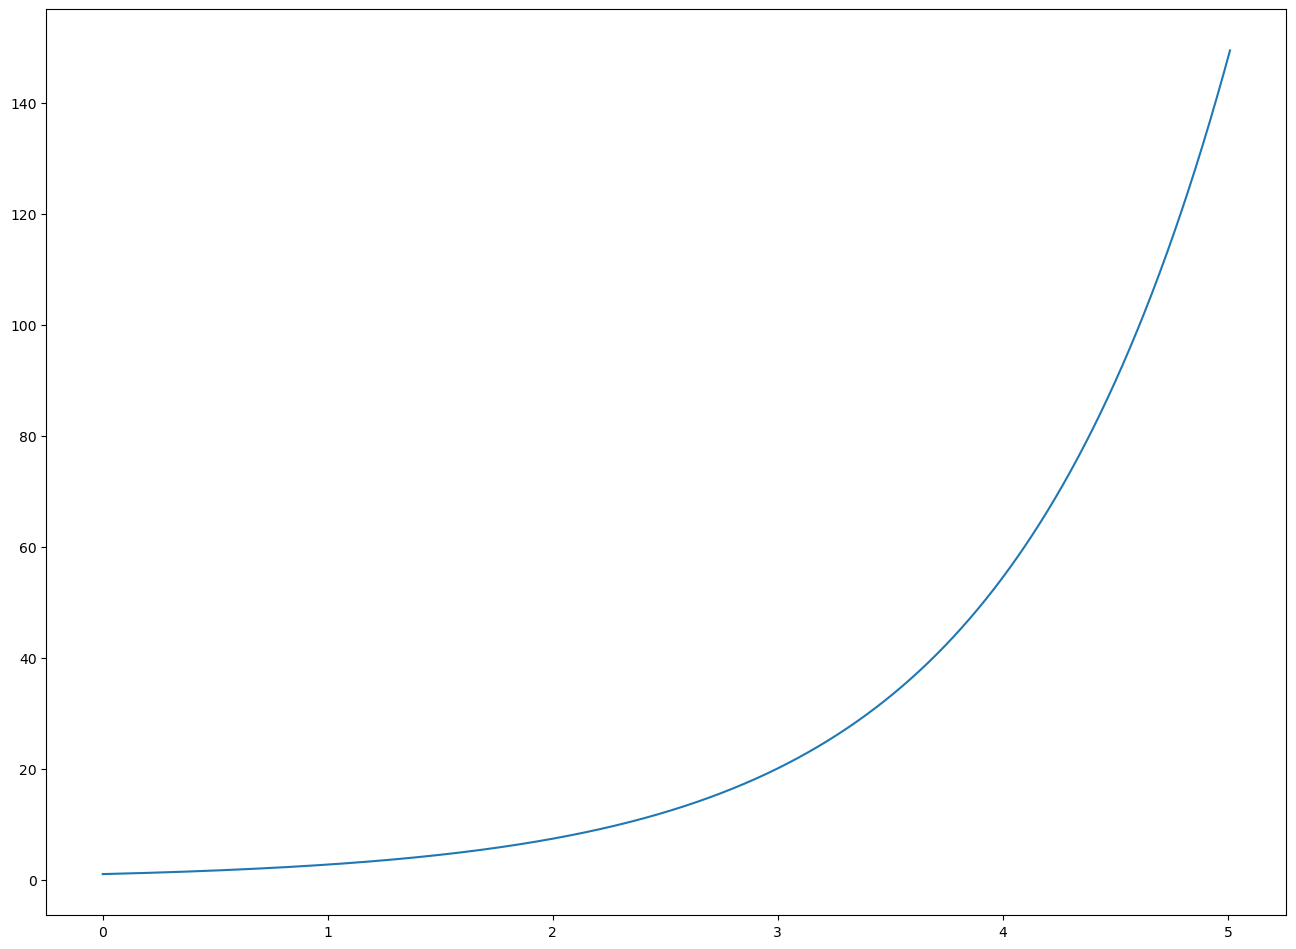

In [9]:
def f_exp(t, x):
    return x

t, x = solve_euler_explicit(f_exp, 1, 0.001, 0, 5.01) #x0 = 0 ne fonctionne pas ?
#0.1  : idée
#0.01 : plus proche : vérifier convergence comment ?
#0.001  plus correct MS diverge toujours
# après : erreur ne diminue plus ?, voire même augmente ???
#ne converge pas vraiment ?
print(np.exp(0))
print(x[0])
print(np.exp(5))
print(x[-1])
plt.plot(t, x);

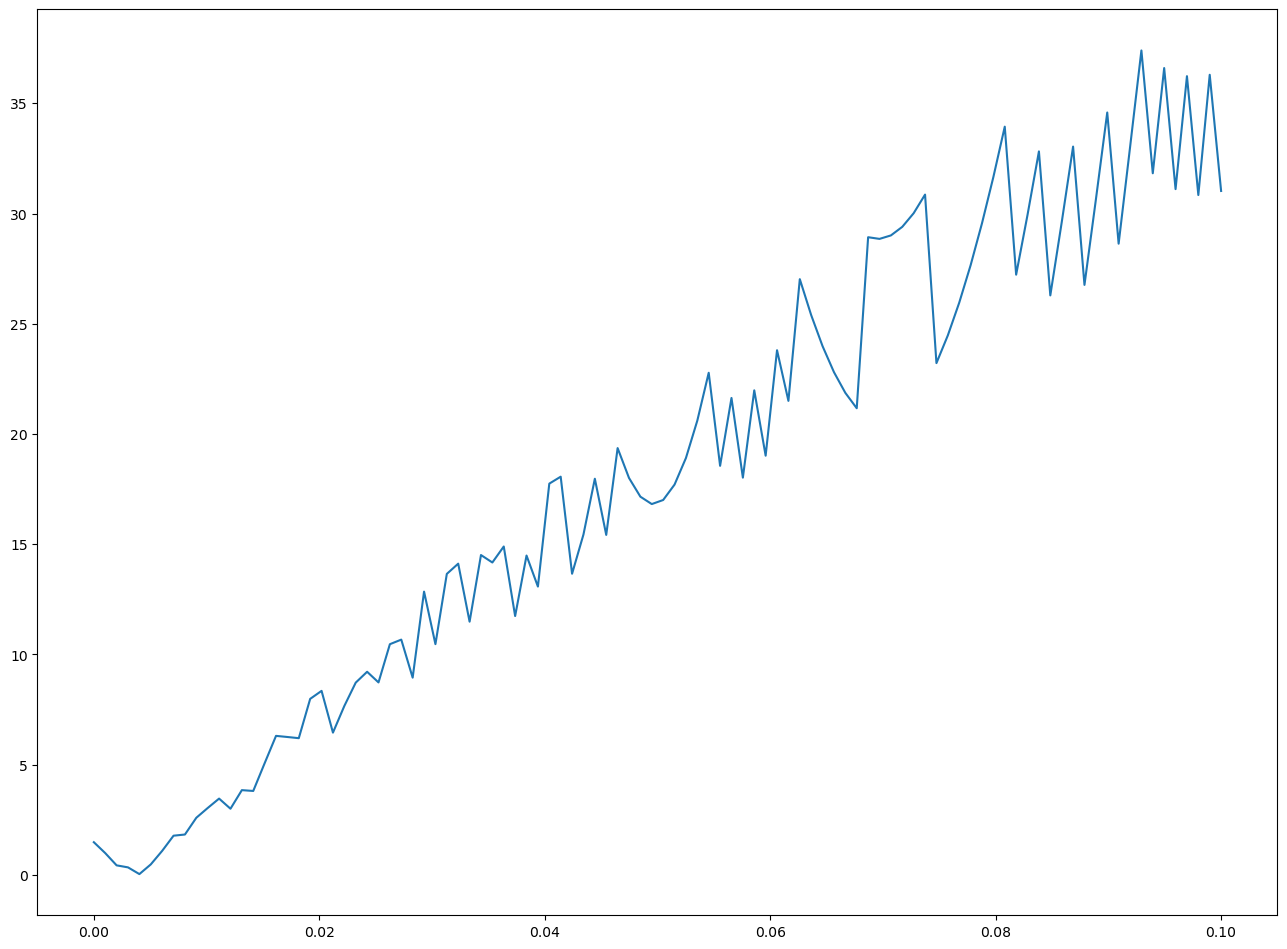

In [10]:
p = np.linspace(0.00001,0.1,100)
d = []
e = np.exp(5)

for ptmp in p:
    d.append(np.abs(e - solve_euler_explicit(f_exp, 1, ptmp, 0, 5.01)[-1][-1]))

plt.plot(p, d); # doit obtenir droite


## Question 7

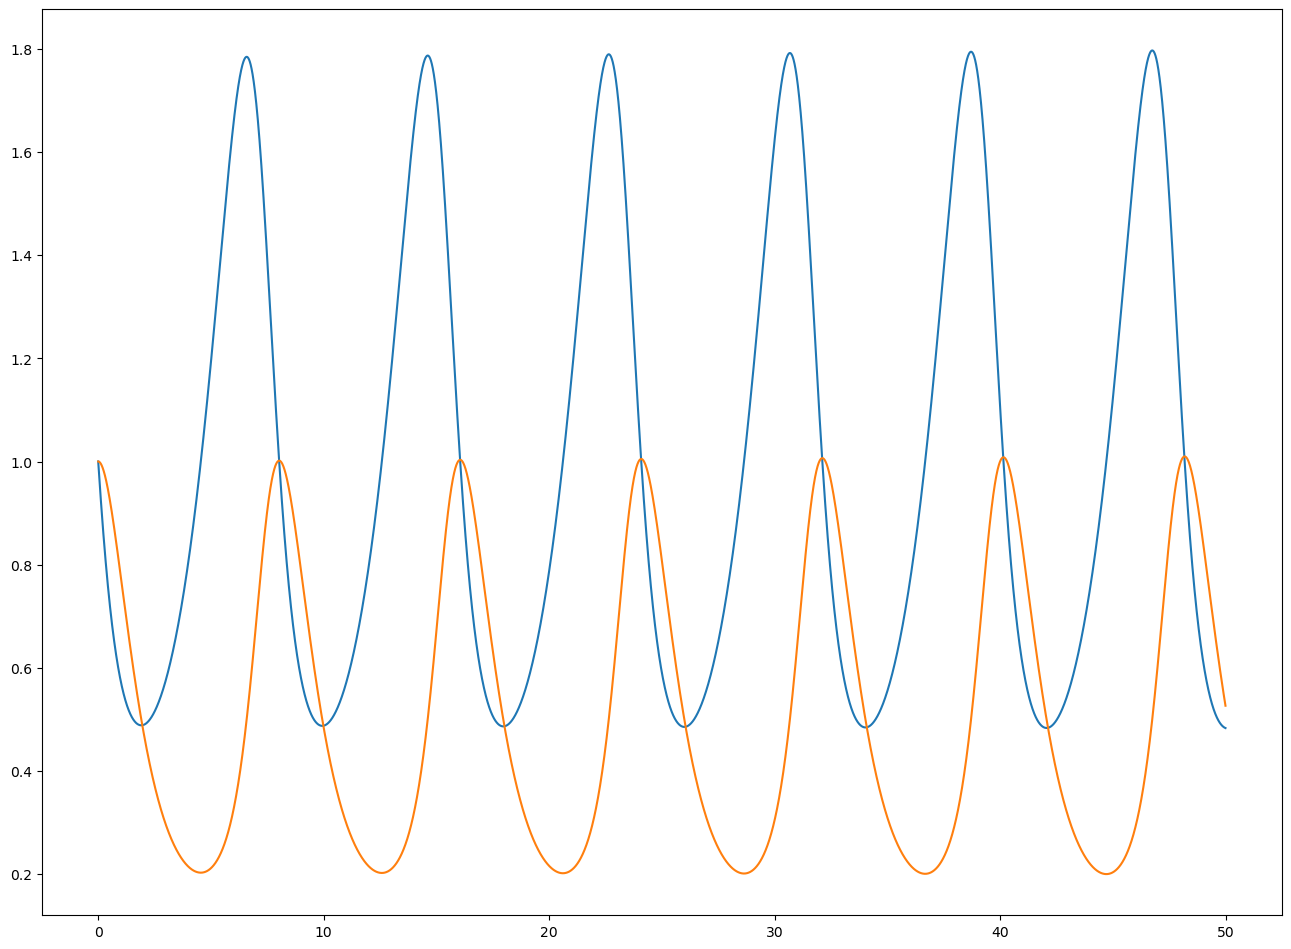

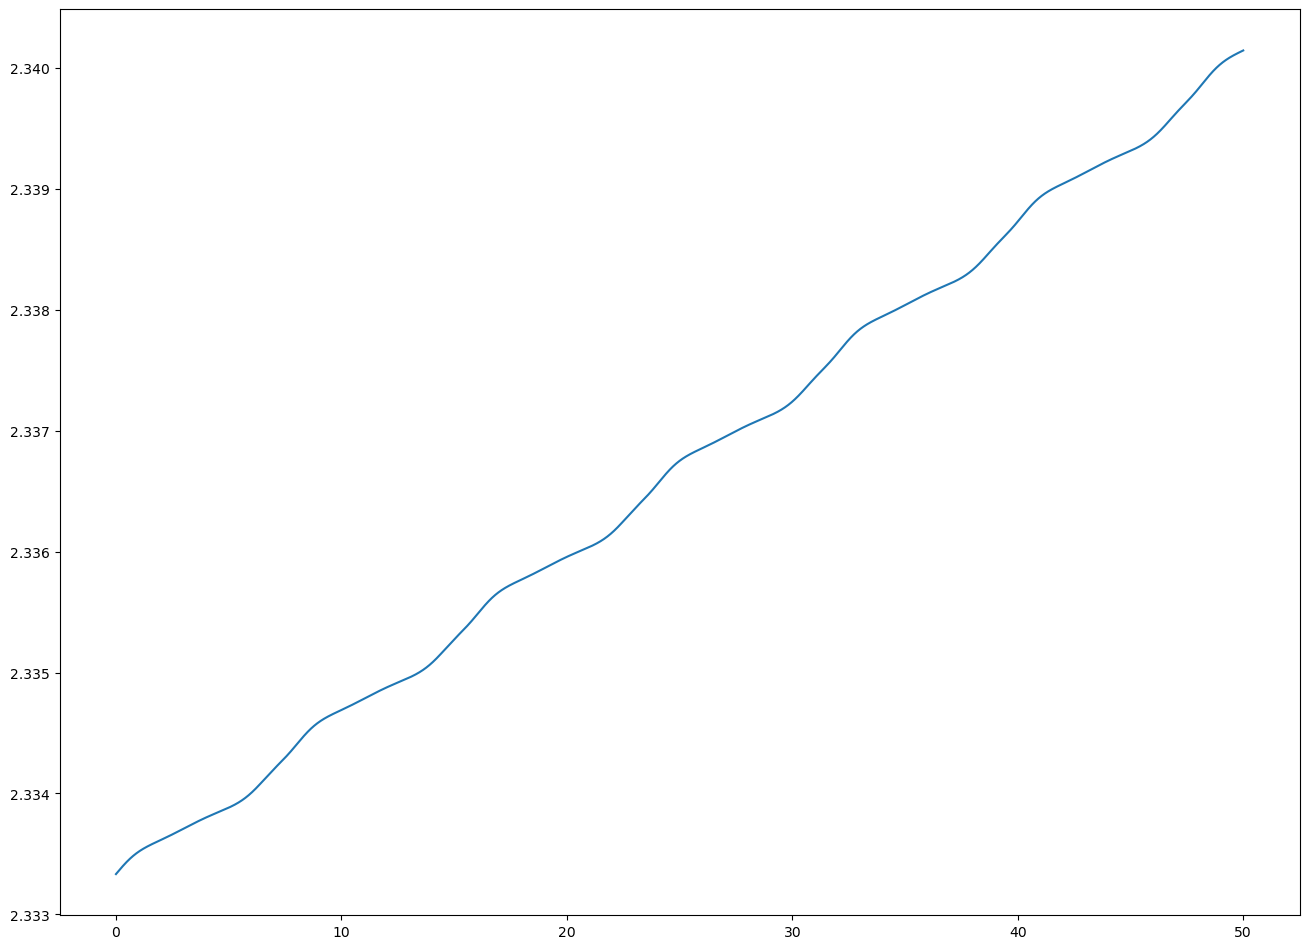

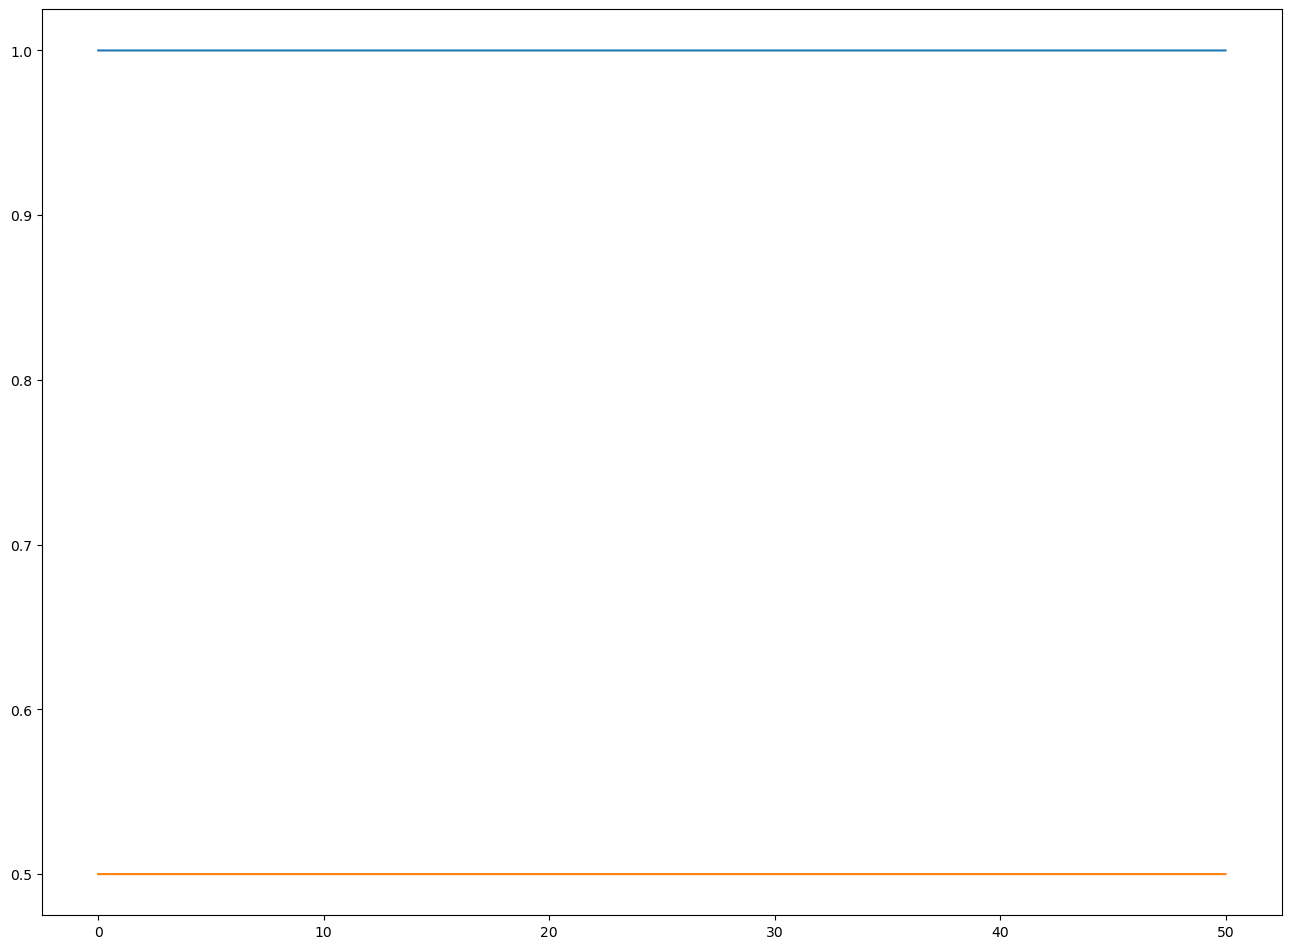

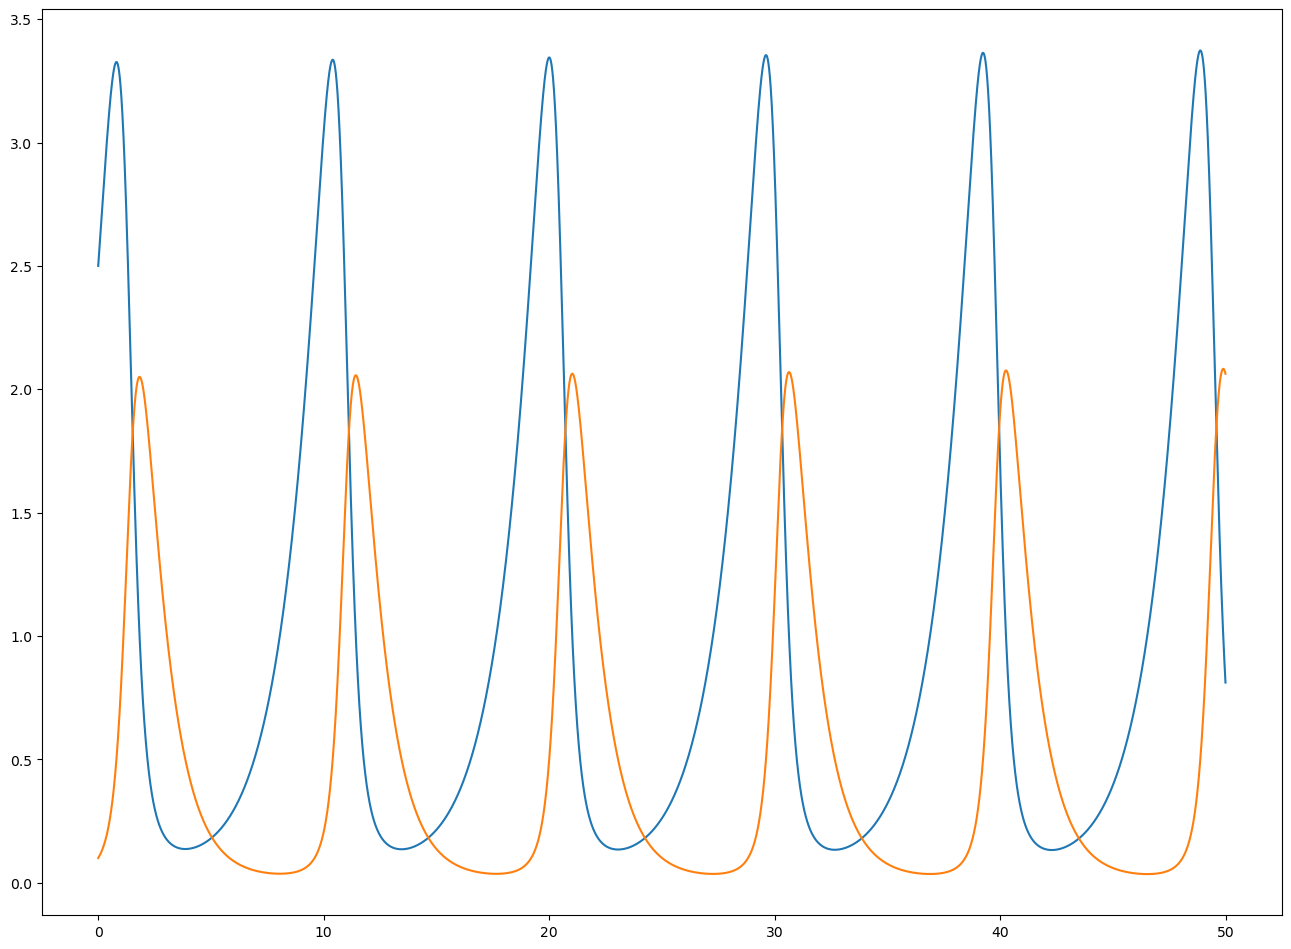

In [11]:
## va diverger en temps long ? 
t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [1.0,1.0], 0.001, 0.0, 50)
plt.plot(t, x);

plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante

plt.figure()
t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [1.0,0.5], 0.001, 0.0, 50) # point fixe
plt.plot(t, x);

plt.figure()
t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [2.5,0.1], 0.001, 0.0, 50) # point fixe
plt.plot(t, x);

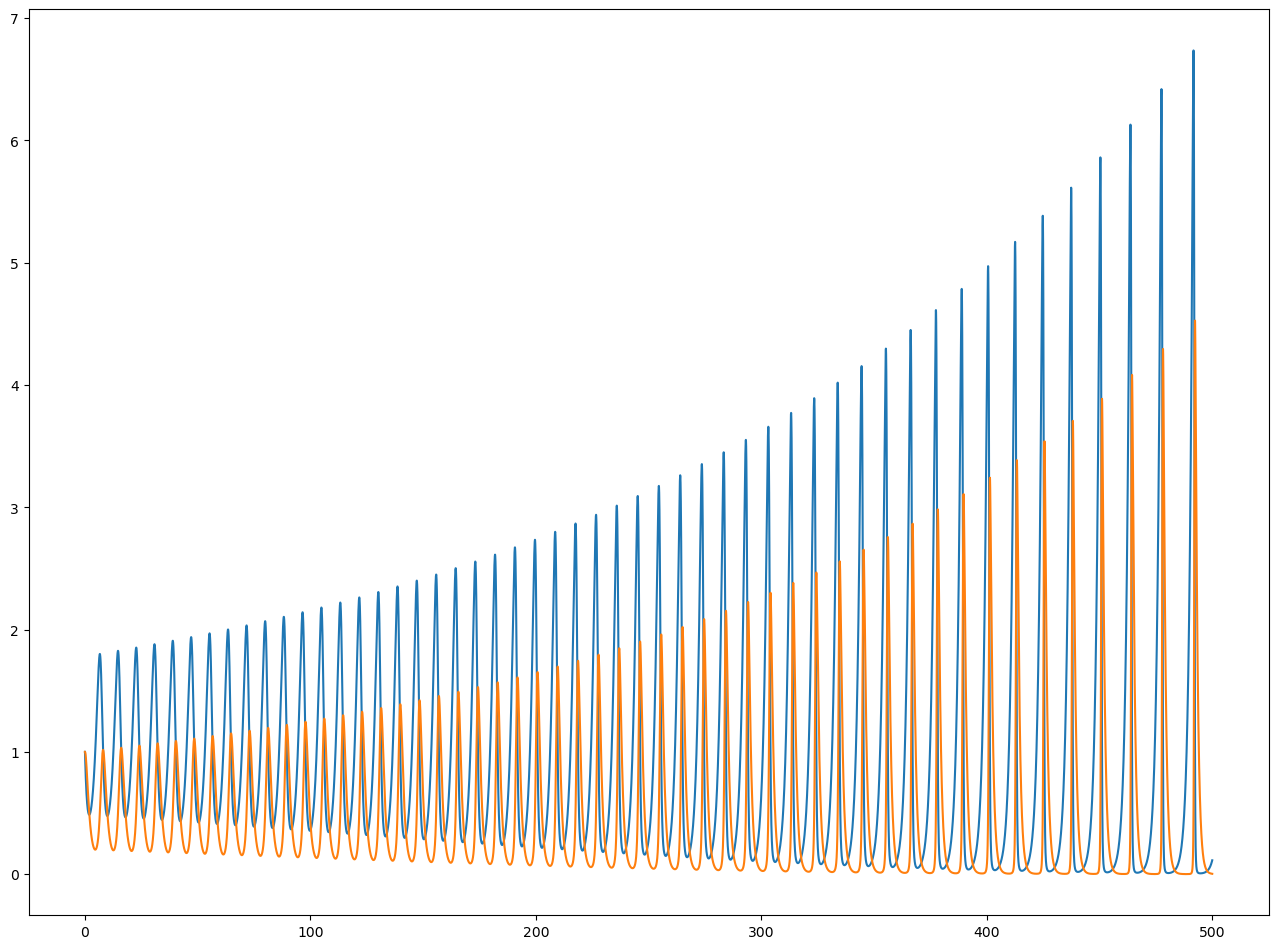

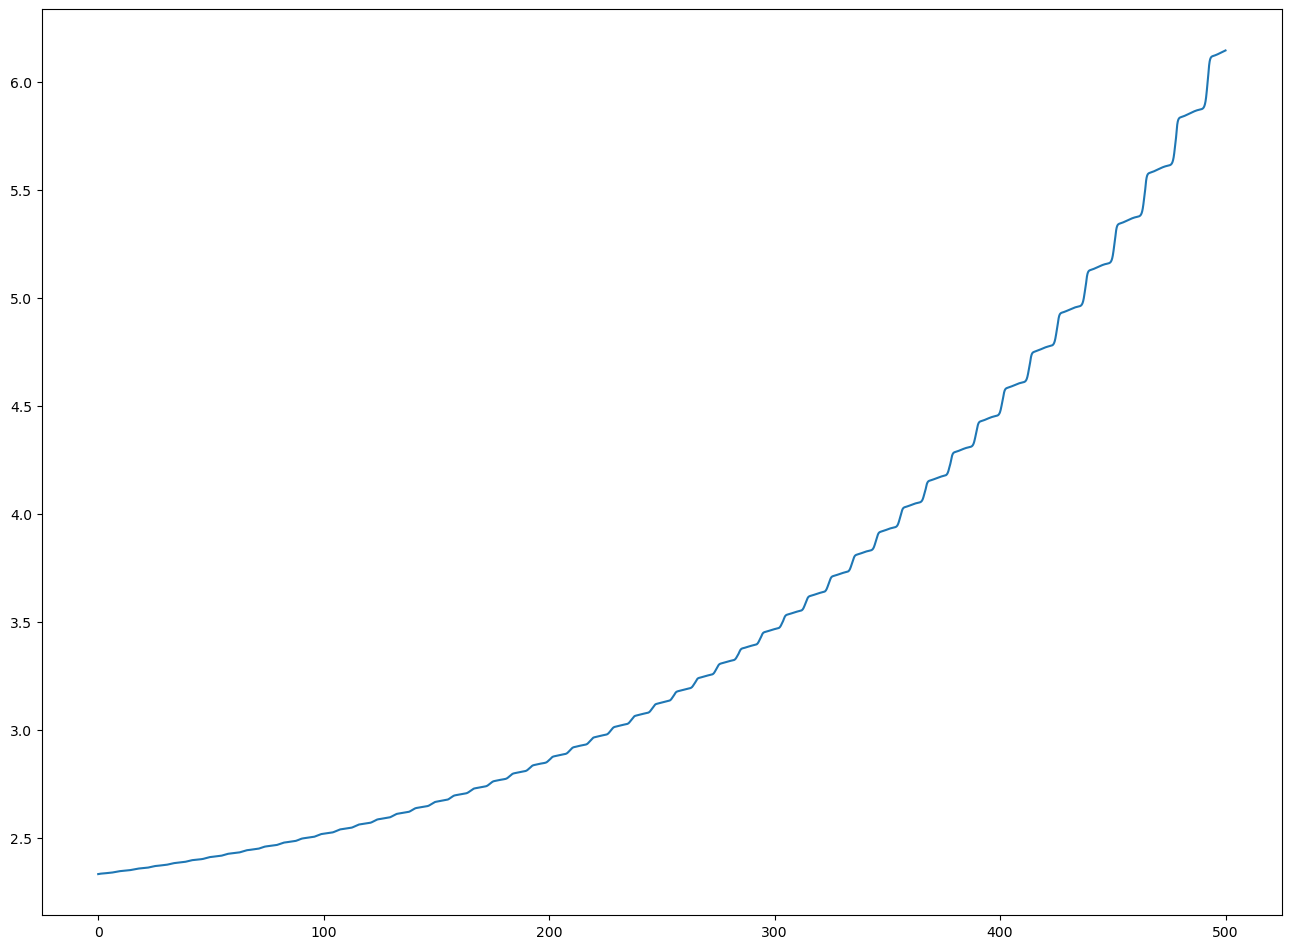

In [12]:
# Temps long

t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [1.0,1.0], 0.01, 0.0, 500) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante
# semble non borné, diverger : contradictoire

In [13]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t = [t0+n*dt for n in np.arange(0,(tf-t0)//dt+1)]
    x = [x0]
    for i,tps in enumerate(t[:-1]):
        x_exp = (x[-1] + dt*f(tps, x[-1]))
        for _ in range(itermax):
            x_exp = x[-1] + dt*f(t[i+1], x_exp)
        x.append(x_exp)
    return t, x

# p 8 implicite ?
#seuil utilisateur ou iter_max

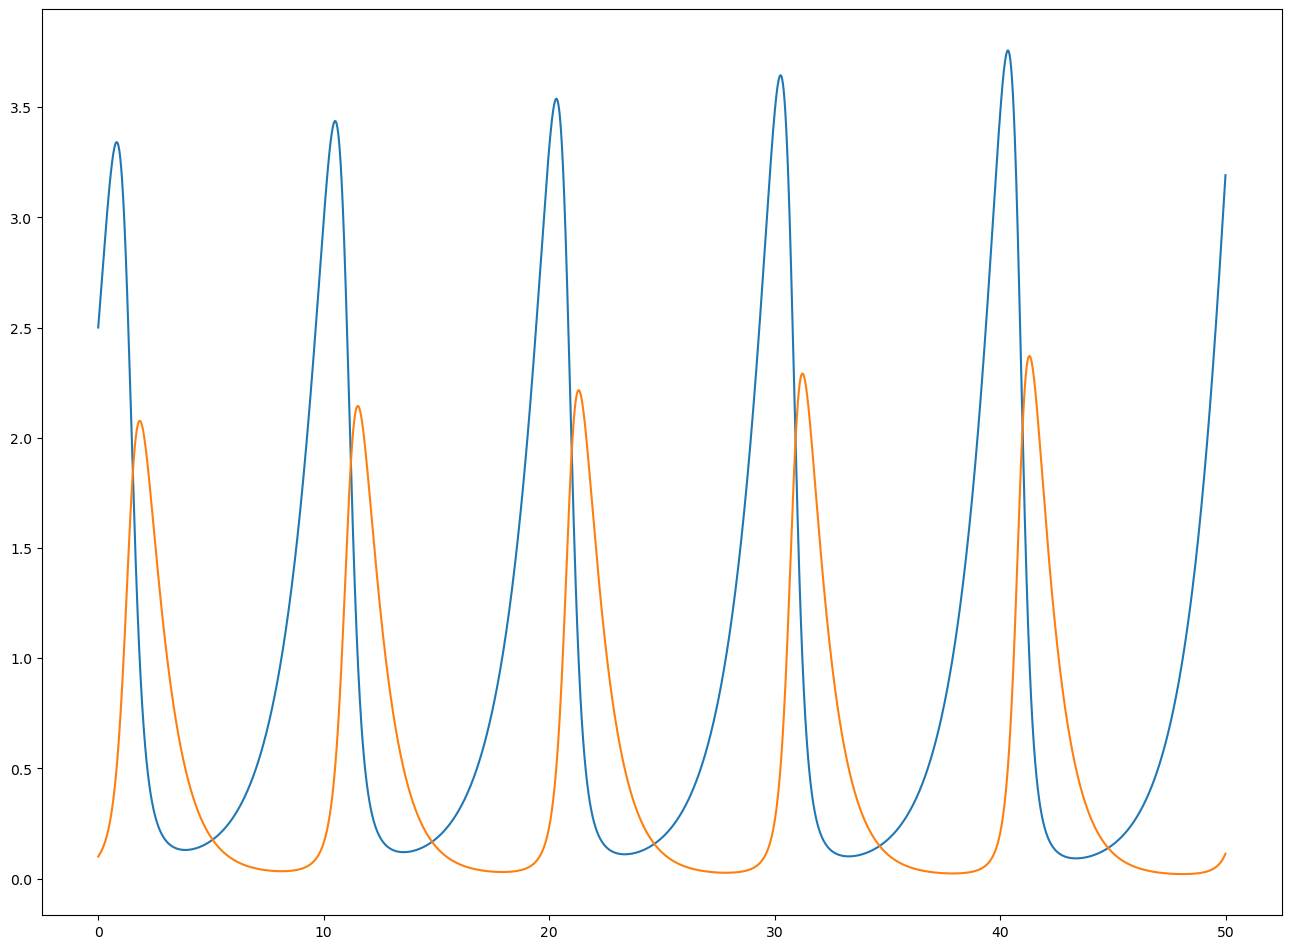

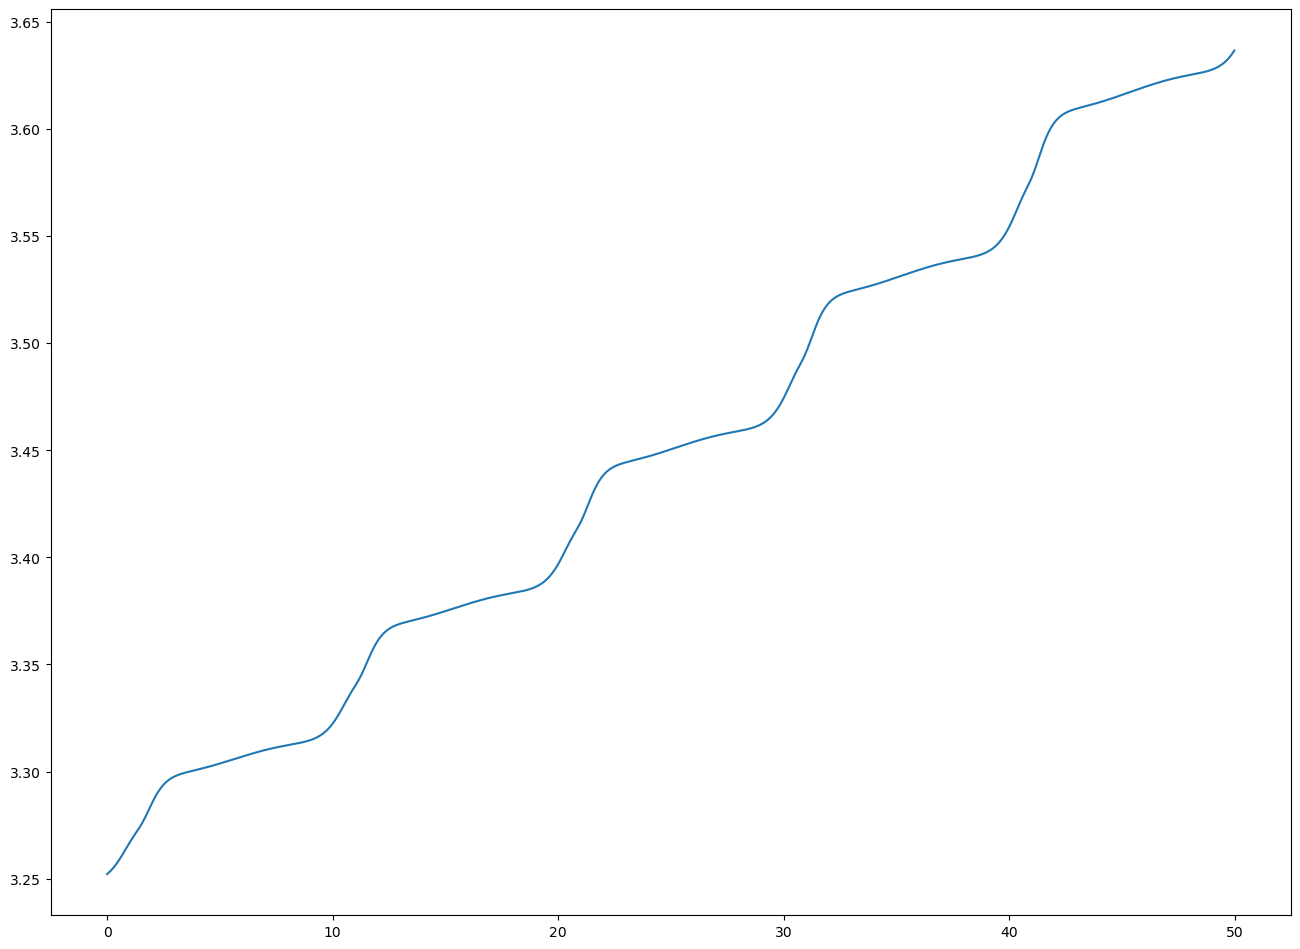

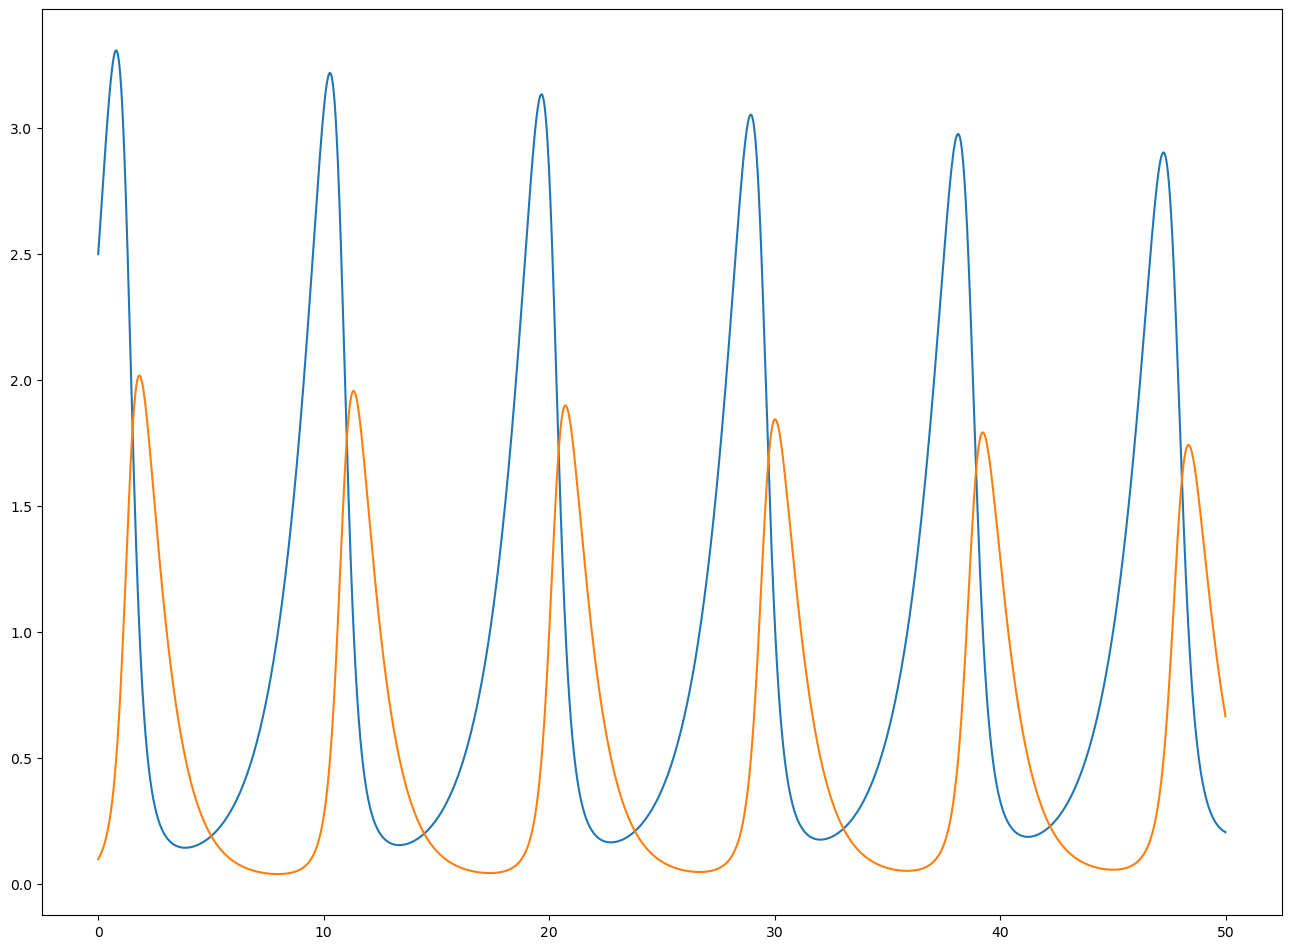

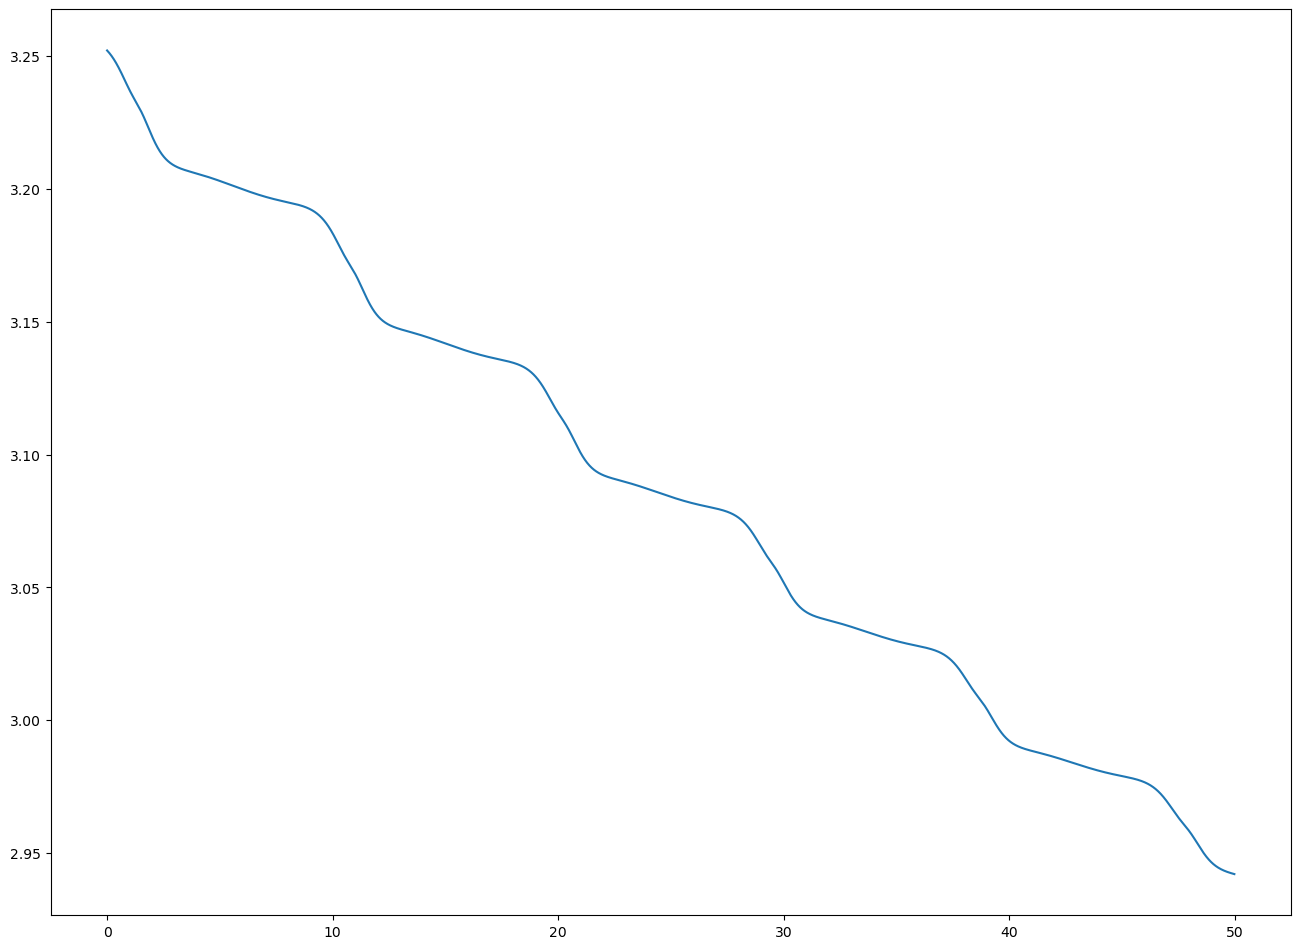

In [14]:
t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [2.5,0.1], 0.01, 0.0, 50) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1]));

plt.figure()
t, x = solve_euler_implicit((lambda tps, xt : lk(xt[0], xt[1])), [2.5,0.1], 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante

In [15]:
def lk2(u, h, h0):
    def f(x1, x2):
        u1, u2 = u(x1, x2)
        hc = h(x1, x2)
        return np.array([x1*(alpha-beta*x2)-u1*(hc-h0),-x2*(gamma-delta*x1)-u2*(hc-h0)])
    return f

def point_eq():
    return gamma/delta,alpha/beta

In [16]:
def solve_euler_symplectic(f, x0, dt, t0, tf, itermax = 100):
    t = [t0+n*dt for n in np.arange(0,(tf-t0)//dt+1)]
    x = [x0]
    for i,tps in enumerate(t[:-1]):
        un, vn = x[-1]
        un1 = un/(1-dt*(1-vn))
        vn1 = vn+ dt*(un1-1)
        x.append([un1, vn1])
    return t, x

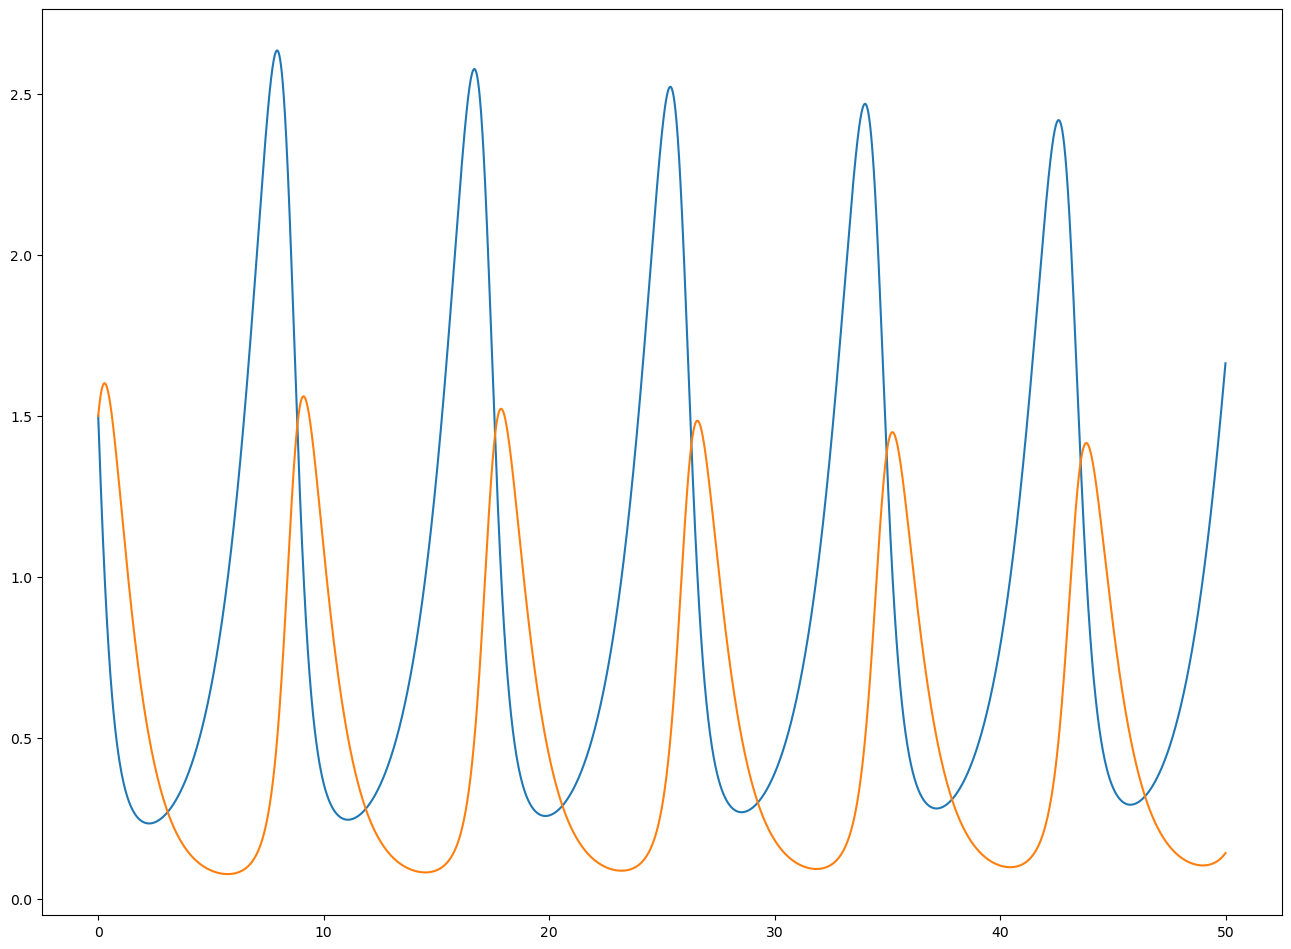

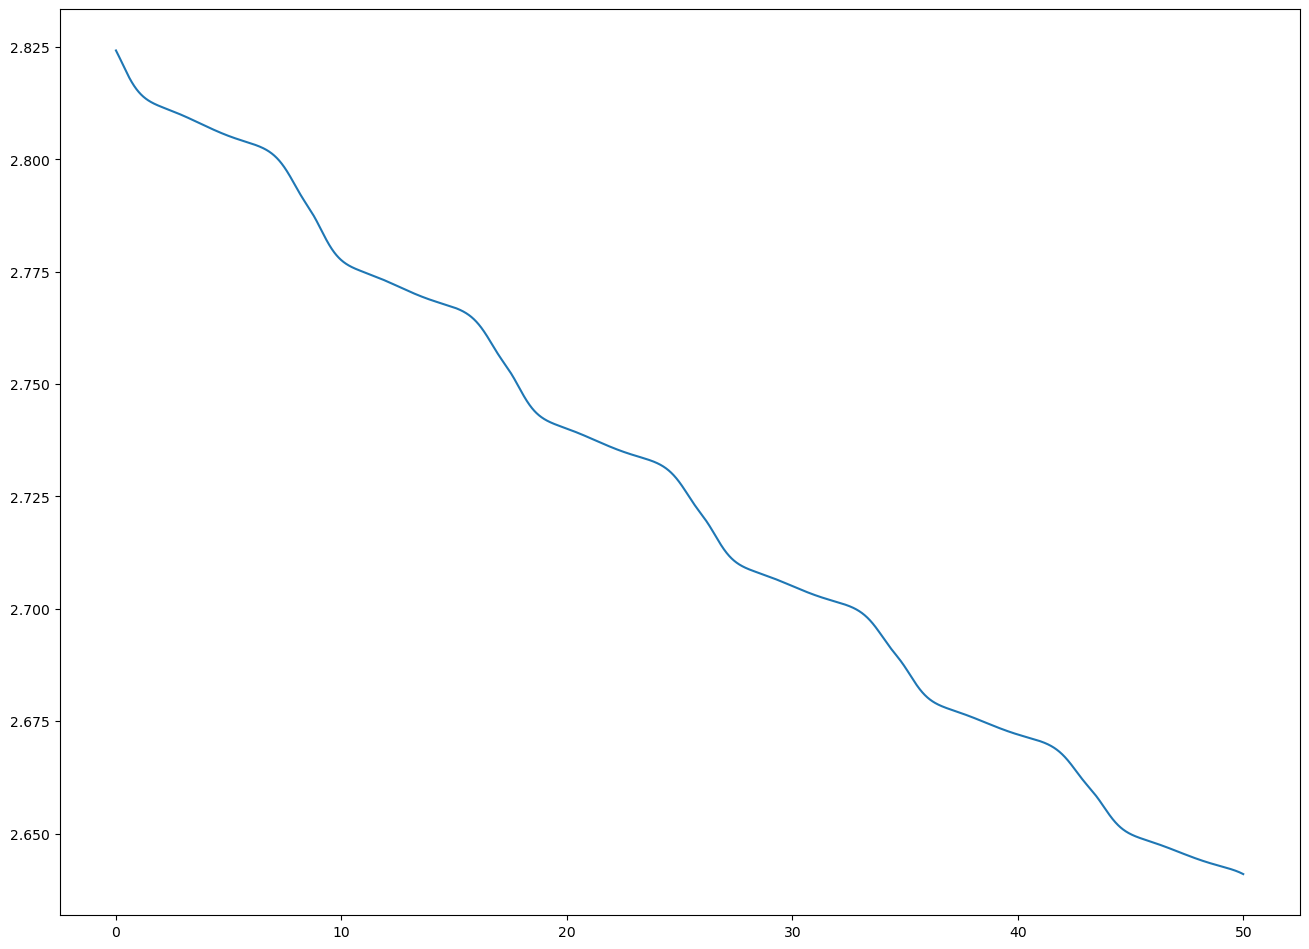

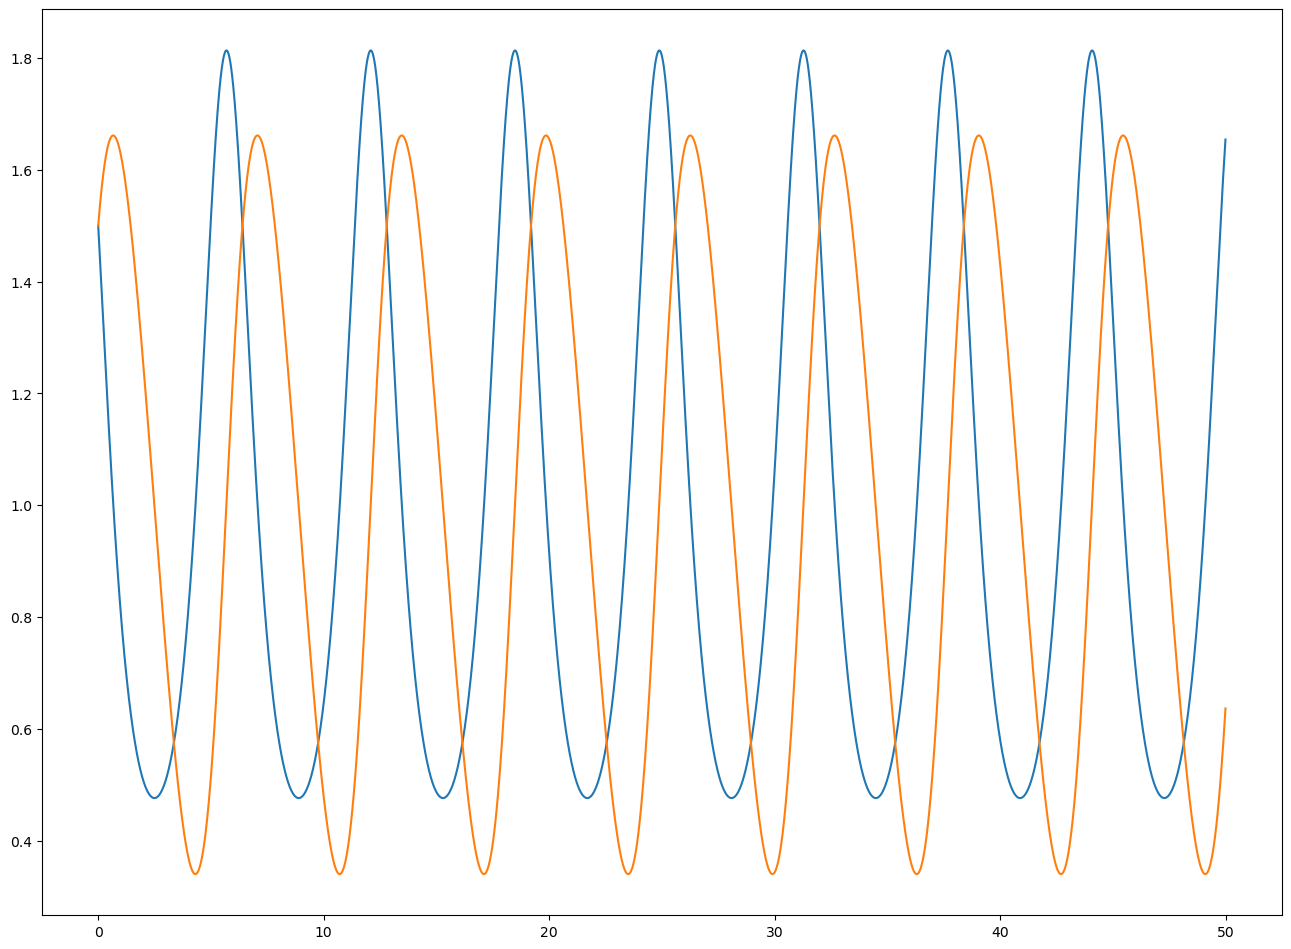

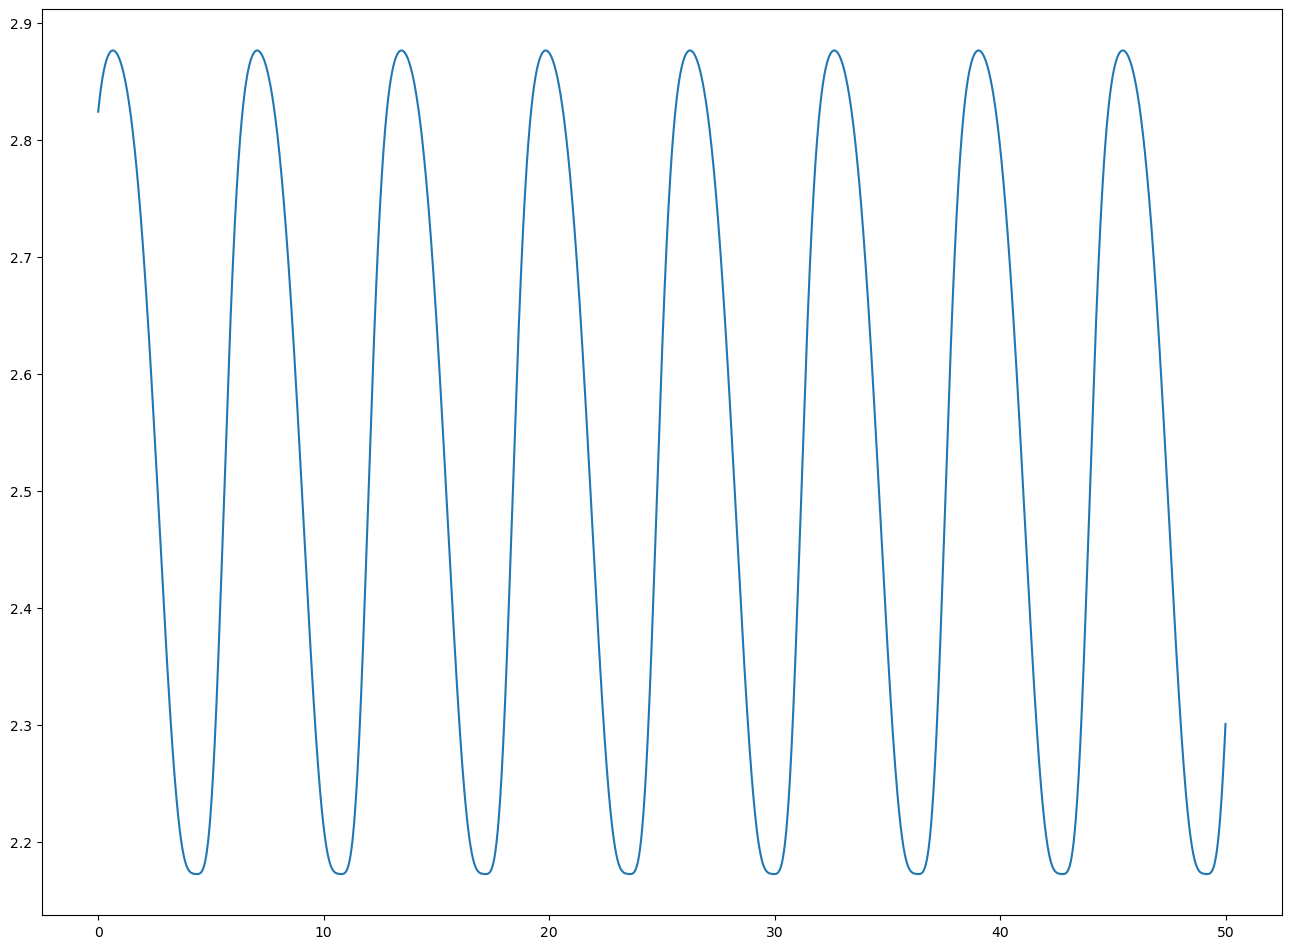

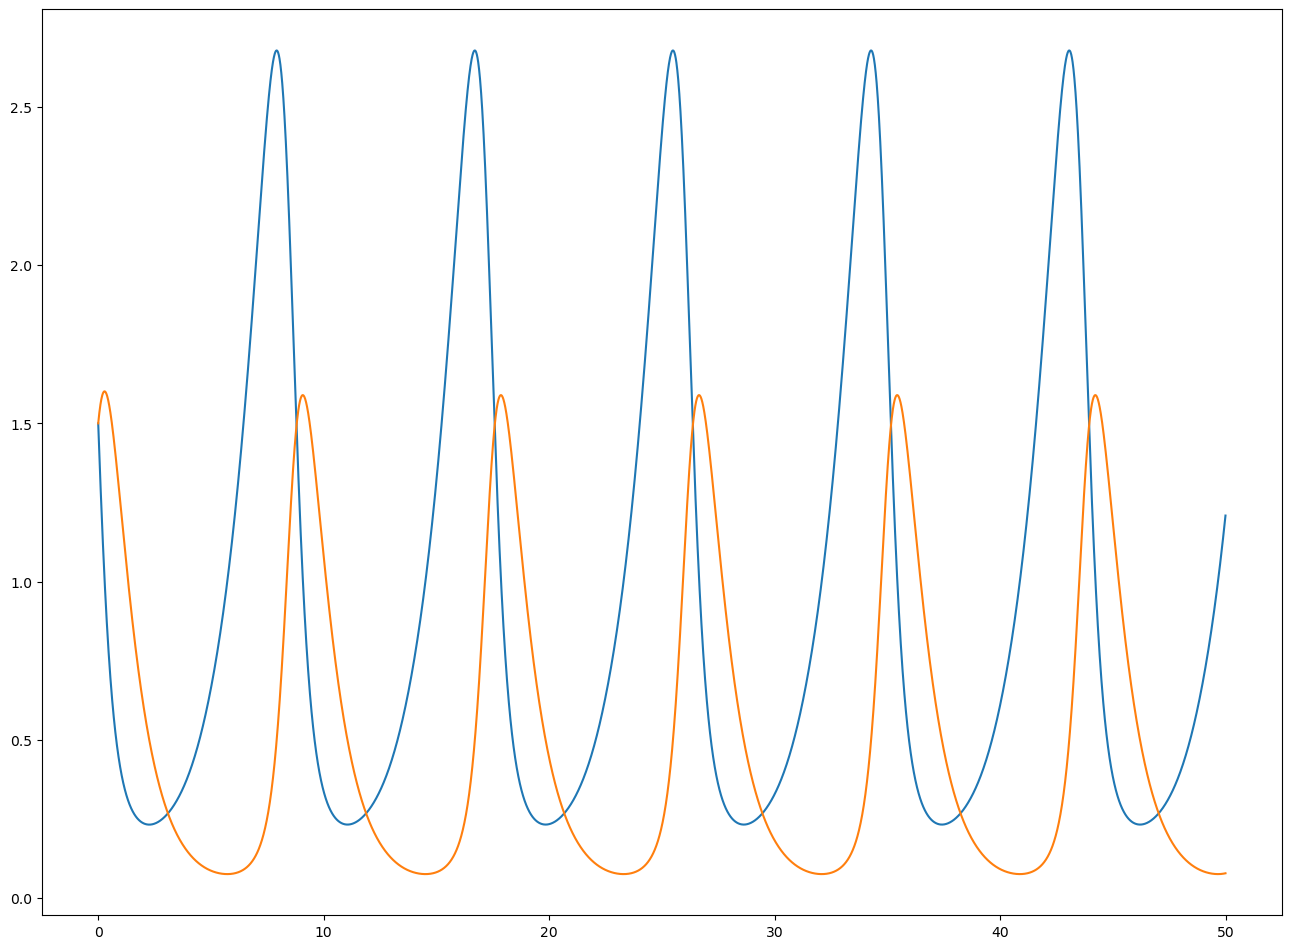

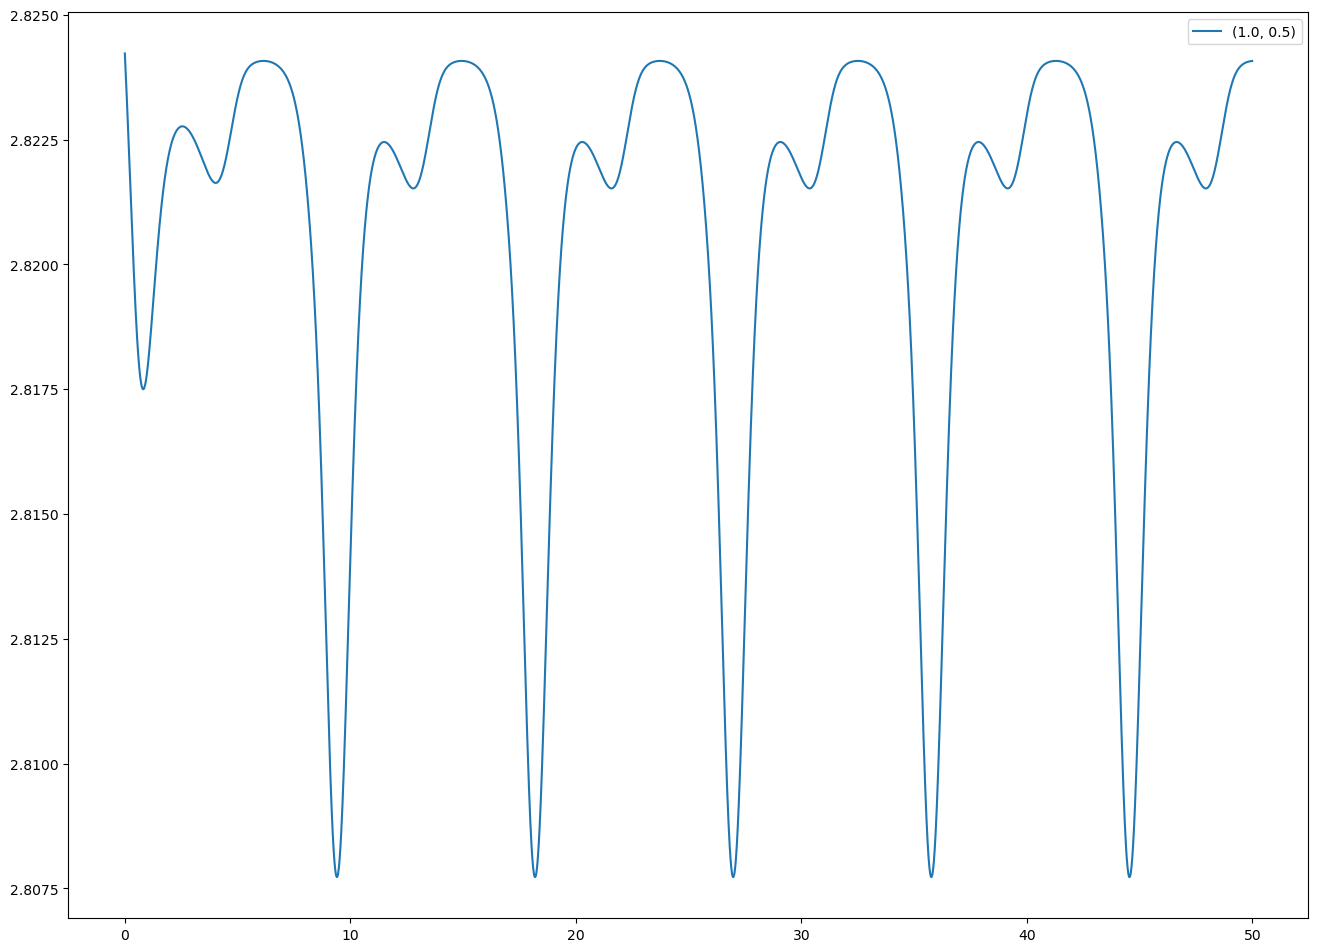

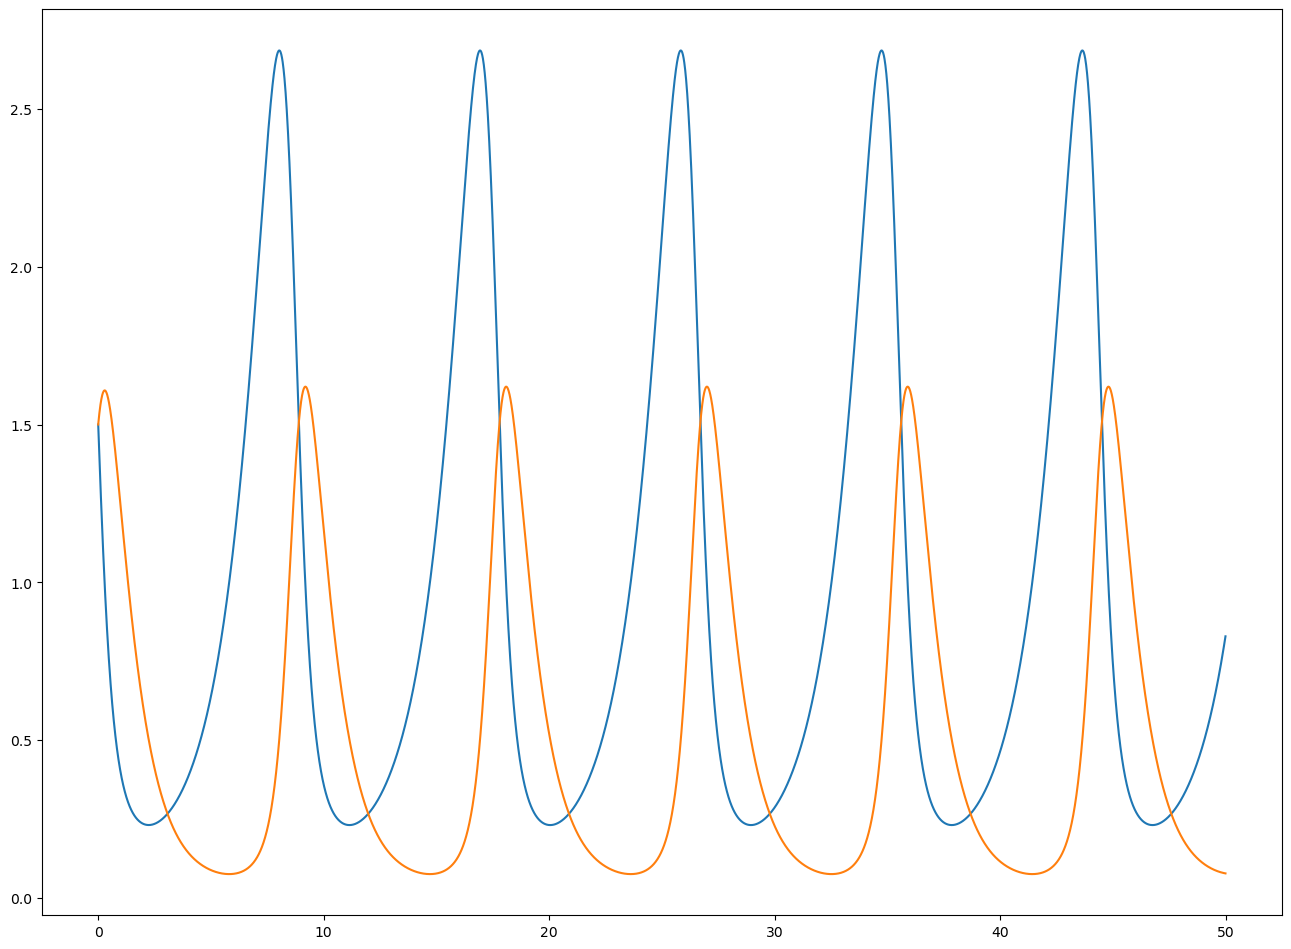

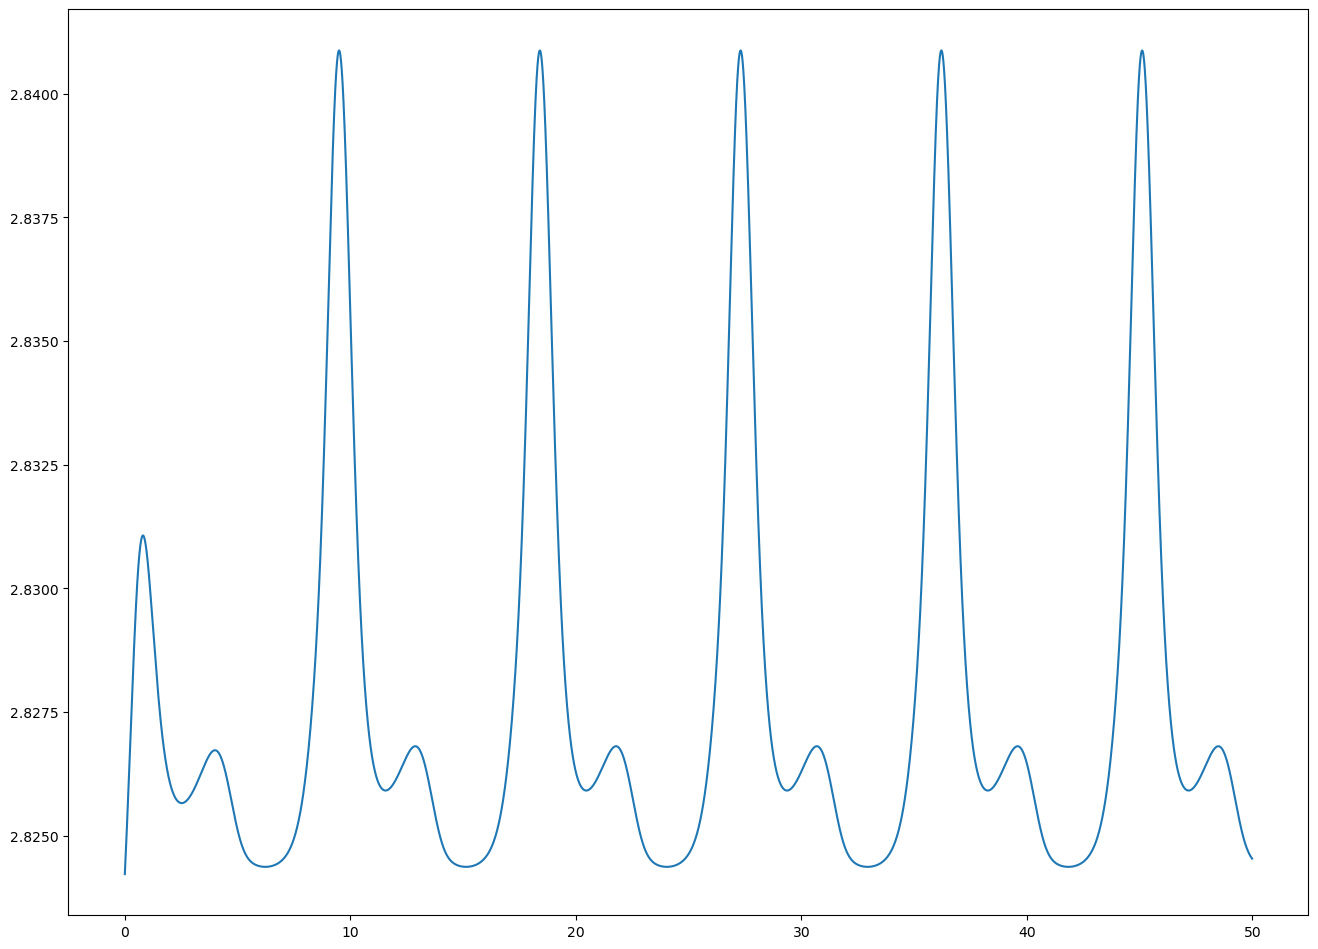

In [17]:
#x0 = [2.5,0.1]
x0=[1.5,1.5]
k=1#>= 4, 5, 10 ne fonctionne pas ; 1/50 foncitonne
#k=1/50 # entier ?
u = lambda z1, z2 : [-k*(delta-gamma/z2*z1),-k*(beta-alpha/z1*z2)]


t, x = solve_euler_implicit((lambda tps, xt : lk(xt[0], xt[1])), x0, 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante

#faire un portrait de phase de la solution ? n'est pas amorti ? choix de k ?
#euler explicite pouis symplectique ... 
#attention x à une distance positive de x? sens ?


plt.figure()
t, x = solve_euler_symplectic((lambda tps, xt : lk(xt[0], xt[1])), x0, 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante


plt.figure()
t, x = solve_euler_implicit((lambda tps, xt : lk2(u,     h,     h(*x0))(xt[0], xt[1])),     x0, 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1]), label=f"{point_eq()}"); #h pas du tout constante
plt.legend()

plt.figure()
t, x = solve_euler_explicit((lambda tps, xt : lk2(u,     h,     h(*x0))(xt[0], xt[1])),     x0, 0.01, 0.0, 50) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante



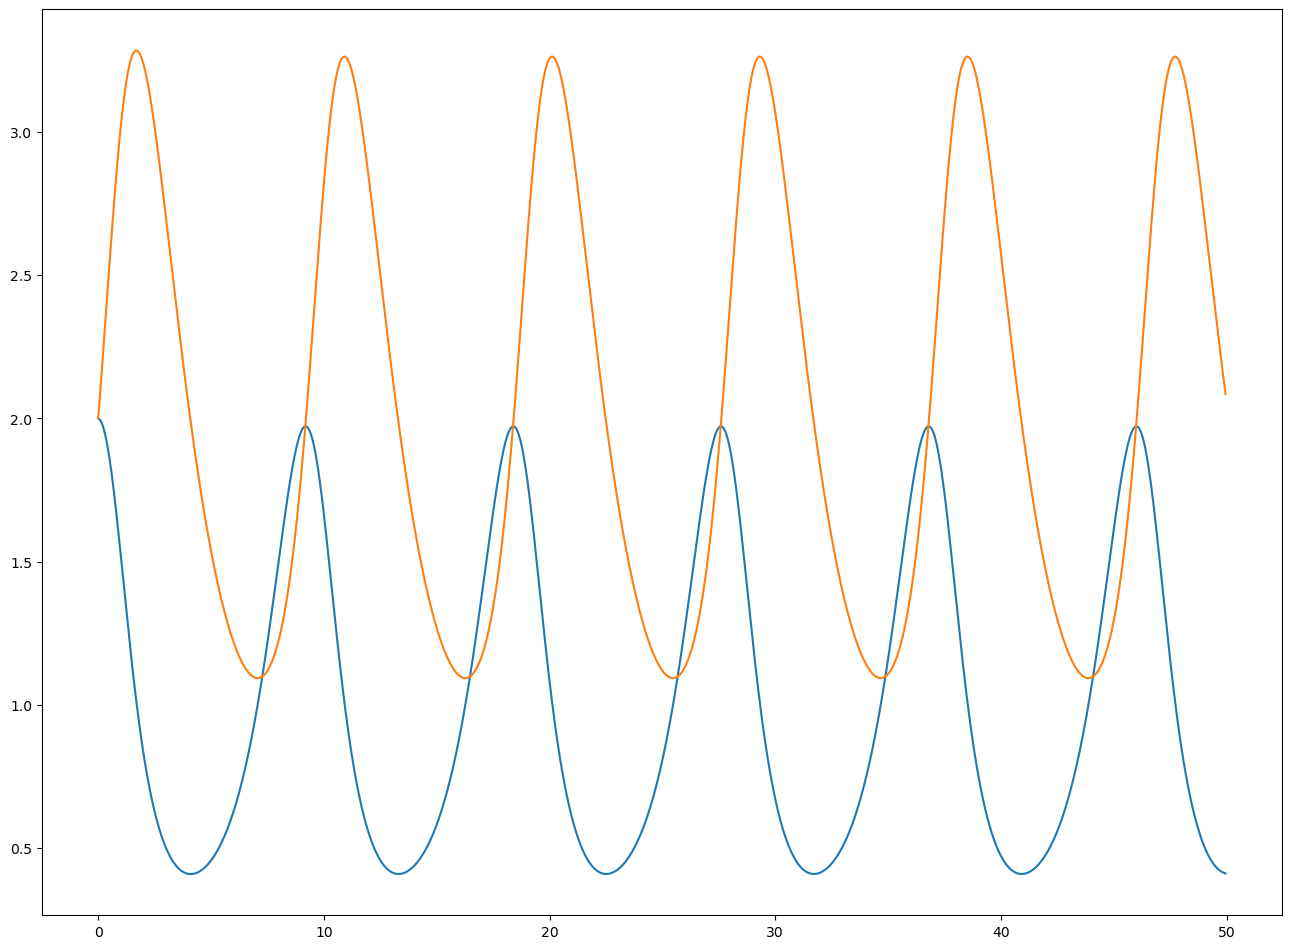

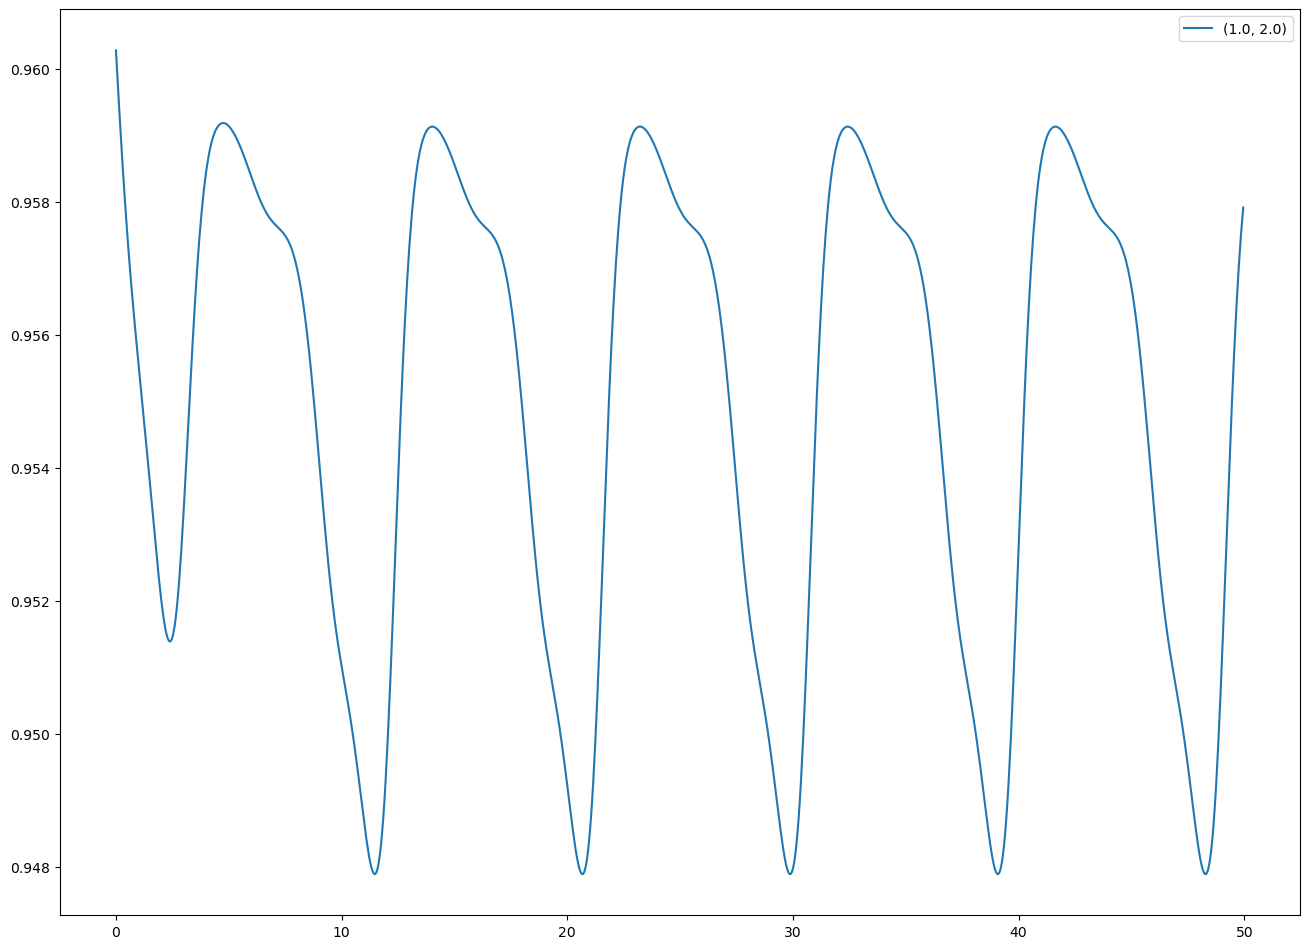

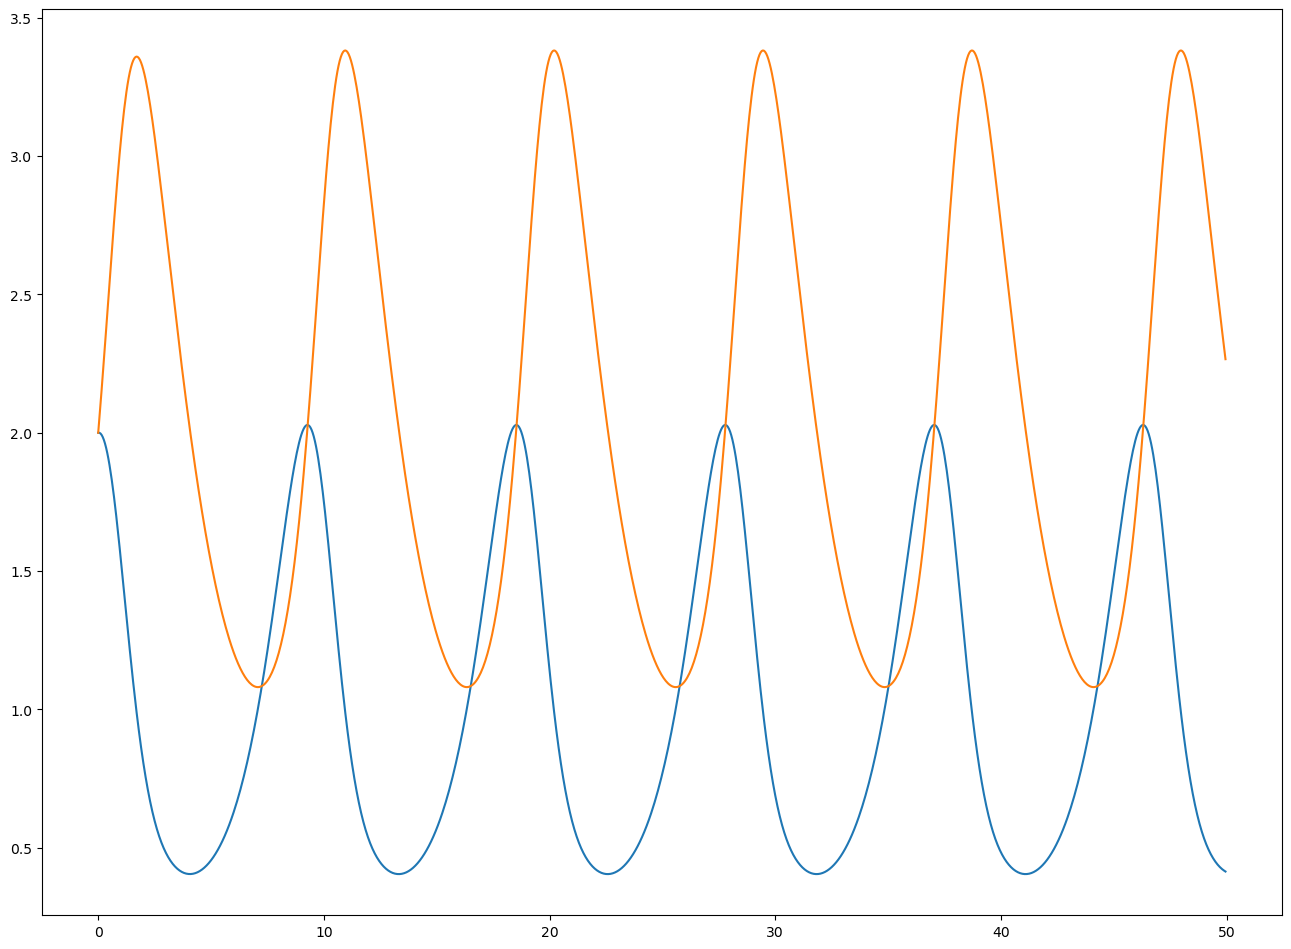

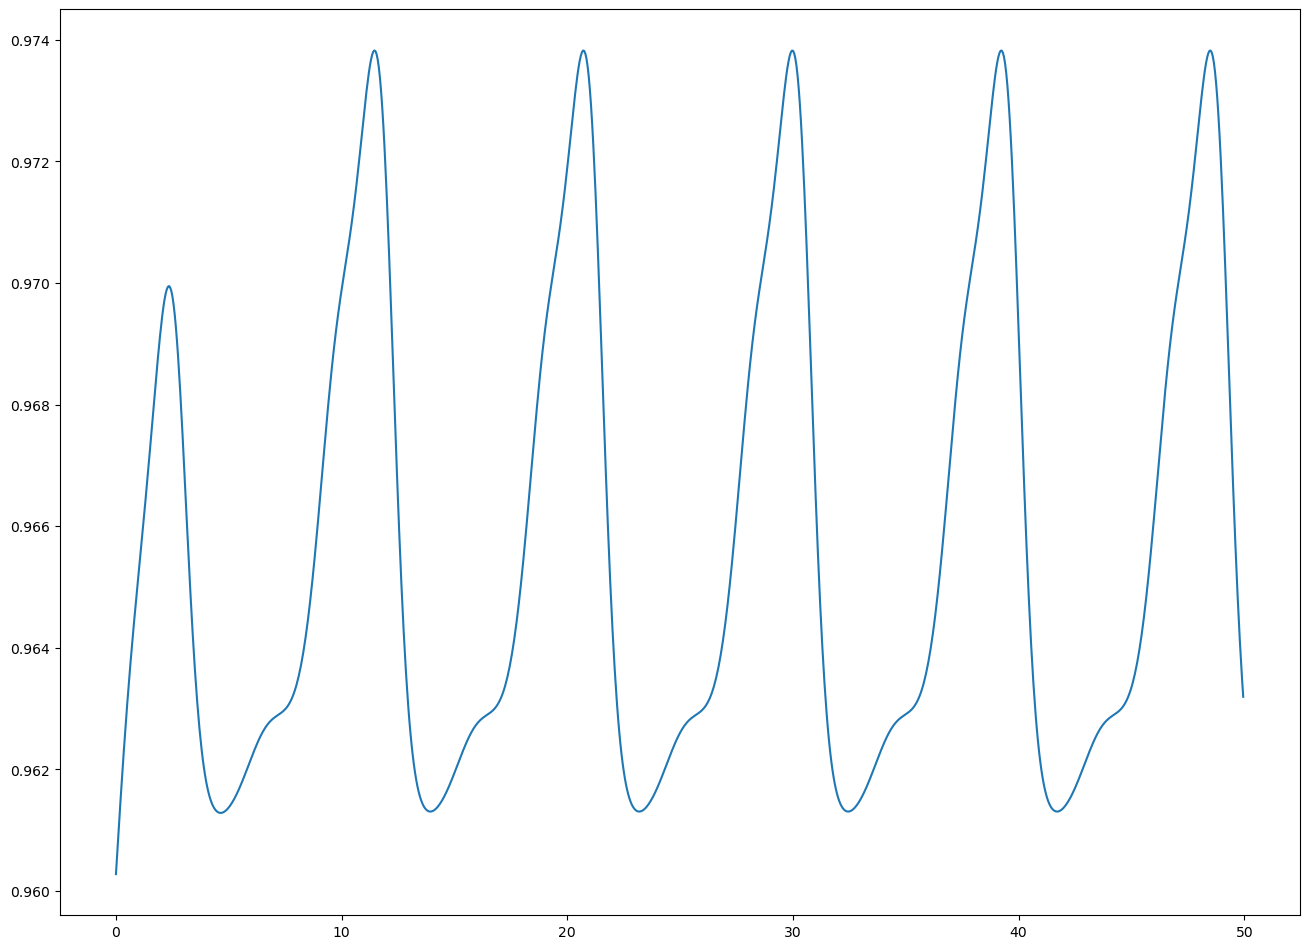

In [38]:
x0=[1.5,1.5]
k=0.01#1#8.7

alpha =1
beta =0.5
gamma = 0.5
delta = 0.5
x0 = [2,2]
k = 5

def lk2(u, h, h0):
    def f(x1, x2):
        hc = h(x1, x2)
        u1, u2 = u(x1, x2)
        return np.array([x1*(alpha-beta*x2)-u1*(hc-h0),-x2*(gamma-delta*x1)-u2*(hc-h0)])
    return f

# Si met le u, ne fonctionne pas !

u = lambda x1, x2 : k*np.array([delta-gamma/x1, beta-alpha/x2])

#u = lambda z1, z2 : [-k*(delta-gamma/z1),-k*(beta-alpha/z2)]


plt.figure()
t, x = solve_euler_implicit((lambda tps, xt : lk2(u, h,     h(*x0))(xt[0], xt[1])),     x0, 0.05, 0, 50, 10)#0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1]), label=f"{point_eq()}"); #h pas du tout constante
plt.legend()

plt.figure()
t, x = solve_euler_explicit((lambda tps, xt : lk2(u, h,     h(*x0))(xt[0], xt[1])),     x0, 0.05, 0, 50)#x0, 0.01, 0.0, 50) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante


Q7 : Cauchy-Lipschitz, car fonctionne pour le h = H0, donc par unicité de la solution c'est la bonne
Q10 : minorer C à l'aide de considérations sur x1 et x2, et utiliser la constante C pour faire les calculs... (redemander à marius au besoin), inégalité & intégration

Tracer les différentes solutions sur le même graphe et comparer pour voir l'ordre
Tracer les portraits de phase des solutions pour la question 10